In [1]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\leo_3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import umap


C:\Users\leo_3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# Cambia la ruta por la de tu CSV
df_pca = pd.read_csv("X_train_pca_k553.csv")  
df_test = pd.read_csv("X_test_pca_k553.csv")

# Si solo quieres los valores numéricos:
X_pca = df_pca.values
X_test = df_test.values
# Inicializamos UMAP para reducir a 2D (para visualización)
reducer = umap.UMAP(n_components=2, random_state=42)

# Ajustamos y transformamos los datos
X_umap_train = reducer.fit_transform(X_pca)
X_umap_test = reducer.fit_transform(X_test)
# X_umap ahora es un array de shape (n_samples, 2)
df_umap_train = pd.DataFrame(X_umap_train, columns=['UMAP1', 'UMAP2'])
df_umap_train.to_csv("X_umap_train.csv", index=False)

df_umap_test = pd.DataFrame(X_umap_test, columns=['UMAP1', 'UMAP2'])
df_umap_test.to_csv("X_umap_test.csv", index=False)

C:\Users\leo_3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


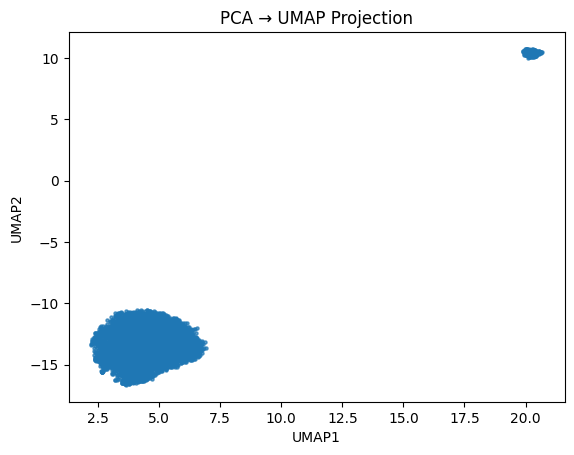

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df_umap_train['UMAP1'], df_umap_train['UMAP2'], s=5, alpha=0.7)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("PCA → UMAP Projection")
plt.show()

In [15]:
import numpy as np
import pandas as pd

def kmeans(X, k=5, max_iters=100, tolerance=1e-4, random_state=42, save_path=None):

    np.random.seed(random_state)

    # === Inicialización de centroides ===
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]

    for iteration in range(max_iters):
        # === Asignar cada punto al cluster más cercano ===
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # === Recalcular centroides ===
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # === Verificar convergencia ===
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tolerance:
            print(f" Convergencia alcanzada en iteración {iteration+1}")
            break

        centroids = new_centroids

    else:
        print(f" Se alcanzó el máximo de {max_iters} iteraciones sin converger")
    if save_path:
        pd.DataFrame(labels, columns=["cluster"]).to_csv(save_path, index=False)
        print(f" Etiquetas guardadas en '{save_path}'")

    print(f"\nTotal de iteraciones: {iteration+1}")
    print(f"Clusters encontrados: {len(np.unique(labels))}\n")

    return labels, centroids, iteration + 1

# Cargar tu dataset reducido
X = pd.read_csv("X_umap_train.csv").values

# Ejecutar K-Means
labels, centroids, iters = kmeans(X, k=5, max_iters=100, tolerance=1e-4, save_path="train_clusters_kmeans.csv")



 Convergencia alcanzada en iteración 23
 Etiquetas guardadas en 'train_clusters_kmeans.csv'

Total de iteraciones: 23
Clusters encontrados: 5



In [16]:
# cargar asignaciones de clusters
clusters = pd.read_csv("train_clusters_kmeans.csv")

# conteo de películas por cluster
print("=== Distribución de películas por cluster ===")
print(clusters['cluster'].value_counts().sort_index())

# porcentaje
print("\n=== Porcentaje de cada cluster ===")
print((clusters['cluster'].value_counts(normalize=True) * 100).round(2))


=== Distribución de películas por cluster ===
cluster
0    1384
1    1079
2    1356
3    1211
4     203
Name: count, dtype: int64

=== Porcentaje de cada cluster ===
cluster
0    26.45
2    25.91
3    23.14
1    20.62
4     3.88
Name: proportion, dtype: float64


In [17]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print(f"Silhouette Score promedio: {score:.4f}")

Silhouette Score promedio: 0.4071
